In [19]:
import numpy as np
import matplotlib.pyplot as plt

def Average(lst): 
    return sum(lst) / len(lst) 

In [20]:

m = 11 #max inventory capacity
n = 5  #number of days in cycle
cycle_num = 10  # number of cycle

print("Enter maximum inventory , M = " )
m = int(input())

print("Enter review period, N = ")
n = int(input())

print("Enter number of cycle =  ")
cycle_num = int(input())

Enter maximum inventory , M = 
11
Enter review period, N = 
5
Enter number of cycle =  
5


[2, 3, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 3, 0, 2, 2, 2, 1, 1, 3, 4, 1, 2, 3]
[1, 0, 0, 0, 1]
cycle no: 1
             Day no:1
			Beg_inv    demand    end_inv    shortage_q    order_q    order_arrives_in
			   3	     2		1	    0		 8		1
             Day no:2
			Beg_inv    demand    end_inv    shortage_q    order_q    order_arrives_in
			   1	     3		0	    2		 8		0
             Day no:3
			Beg_inv    demand    end_inv    shortage_q    order_q    order_arrives_in
			   8	     0		6	    0		 0		0
             Day no:4
			Beg_inv    demand    end_inv    shortage_q    order_q    order_arrives_in
			   6	     1		5	    0		 0		0
             Day no:5
			Beg_inv    demand    end_inv    shortage_q    order_q    order_arrives_in
			   5	     1		4	    0		 7		1
cycle no: 2
             Day no:1
			Beg_inv    demand    end_inv    shortage_q    order_q    order_arrives_in
			   4	     0		4	    0		 7		0
             Day no:2
			Beg_inv    demand    end_inv    shortage_q    order_q    order_arrives_in
			  

<BarContainer object of 25 artists>

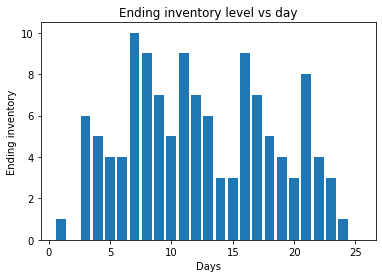

In [21]:
np.random.seed(1)
total_day_of_simulation = cycle_num * n 
end_inv_list = []

#initialization _ day 0
beg_inv = 3
end_inv = 0
shortage_q = 0
shodtage_days = 0
order_q = 8
days_untill_order_arrives = 2


#'''
demands = np.random.choice(a=[0,1,2,3,4] , size = total_day_of_simulation , p=[0.10,0.25,0.35,0.21,0.09]) # size is the needed values, size = 100 will return a list of 100 values
demands = demands.tolist()
#'''
# demands = [1,1,2,3,2, 0,3,1,3,2, 2,2,2,1,0, 2,3,1,2,2, 0,2,1,3,4]
# demands = [1,1,3,2, 4,4,0,1, 3,3]
print(demands)

#'''
lead_time_days = np.random.choice(a=[0,1,2] , size = cycle_num ,p=[0.6,0.3,0.1]) # a is list of outcomes, p is list of their probabilities
lead_time_days = lead_time_days.tolist()
#'''
# lead_time_days = [1,3,1,1,2]
# lead_time_days = [1,1]
print(lead_time_days)



for cycle in range(1,cycle_num+1):
    print("cycle no: "+str(cycle))
    for day in range(1, n+1):  

        days_untill_order_arrives = days_untill_order_arrives - 1
        if days_untill_order_arrives < 0:
            beg_inv = beg_inv + order_q
            order_q = 0
            days_untill_order_arrives = 0

        print("             Day no:"+str(day))
        demand = demands.pop(0)

        total_demand = demand + shortage_q

        if total_demand > beg_inv:
            end_inv = 0
            shortage_q = total_demand - beg_inv
            shodtage_days = shodtage_days + 1
        else:
            end_inv = beg_inv - total_demand 
            shortage_q = 0
        
        #on the last day of cycle >>> place orderr
        if day == n:   # n is indicating the last day of cycle 
            lead_time = lead_time_days.pop(0)
            days_untill_order_arrives = lead_time
            order_q = m - end_inv
        
        print("\t\t\tBeg_inv    demand    end_inv    shortage_q    order_q    order_arrives_in")
        print("\t\t\t   "+str(beg_inv)+"\t     "+str(demand)+"\t\t"+str(end_inv)+"\t    "+str(shortage_q)+"\t\t "+str(order_q)+"\t\t"+str(days_untill_order_arrives))
        
        end_inv_list.append(end_inv)
        beg_inv = end_inv

        
        if len(demands) == 0:
            break
print ("shortage occures in "+str(shodtage_days)+" days")
print ("avg ending inventory "+str(Average(end_inv_list))+" units\n")


x=range(1 , total_day_of_simulation +1)

plt.title('Ending inventory level vs day')
plt.xlabel('Days')
plt.ylabel('Ending inventory')

plt.bar(x,end_inv_list)